<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
   <br>
    <font face="Times New Roman" size=18>
    <p></p>
    In the name of God  
    </font>
    <br><br>
    <font face="Times New Roman" size=5 color=blue>
    Python for Data Mining<br>      </font>
    <font face="Times New Roman" size=4 color=blue> 
        Insurance Research Center
    </font>
    <br>
    <br>
    <font face="Times New Roman" size=4 color=#FF7500>
    Khayyam Salehi 
    </font>
    <br>       
    <font face="Times New Roman" size=3 color=#FF7500>
    Assistant Professor
    <br>
    Department of Computer science
    <br>
    Shahrekord University
    </font>
    <br>    <br>
</div>
    <hr style="border:2px solid black"> </hr>

# KNN -  K Nearest Neighbors - Classification

<img src="./figs/knn.png" width=500px/>

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('./data/gene_expression.csv')

In [3]:
df.head()

,Gene_One,Gene_Two,Cancer_Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene_One        3000 non-null   float64
 1   Gene_Two        3000 non-null   float64
 2   Cancer_Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<AxesSubplot:xlabel='Gene_One', ylabel='Gene_Two'>

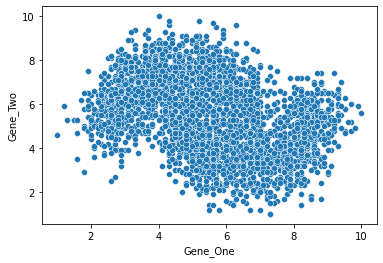

In [5]:
sns.scatterplot(x='Gene_One',y='Gene_Two', data=df)

<AxesSubplot:xlabel='Gene_One', ylabel='Gene_Two'>

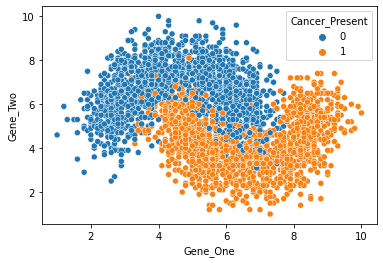

In [6]:
sns.scatterplot(x='Gene_One',y='Gene_Two',hue='Cancer_Present',data=df)

<AxesSubplot:xlabel='Gene_One', ylabel='Gene_Two'>

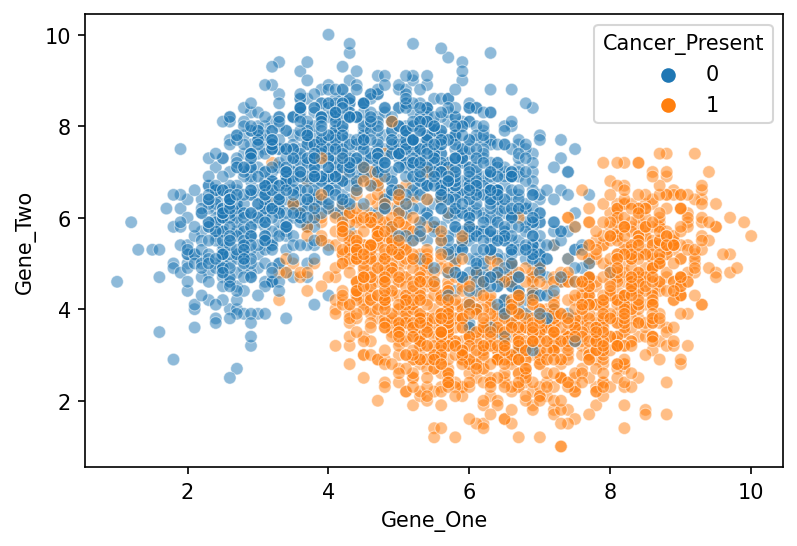

In [7]:
plt.figure(dpi = 150)
sns.scatterplot(x='Gene_One',y='Gene_Two',hue='Cancer_Present',data=df,alpha=0.5)

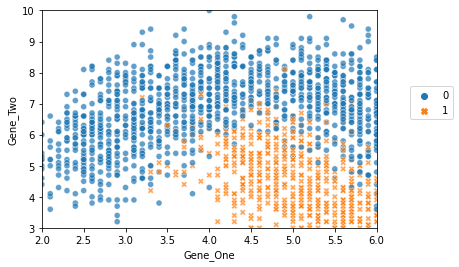

In [8]:
sns.scatterplot(x='Gene_One',y='Gene_Two',hue='Cancer_Present',data=df, 
                style ='Cancer_Present', alpha=0.7 )
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

## Train-Test Split and Scaling Data

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = df.drop('Cancer_Present',axis=1)
y = df['Cancer_Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
full_test = pd.concat([X_test,y_test],axis=1)

In [18]:
len(full_test)

750

<AxesSubplot:xlabel='Gene_One', ylabel='Gene_Two'>

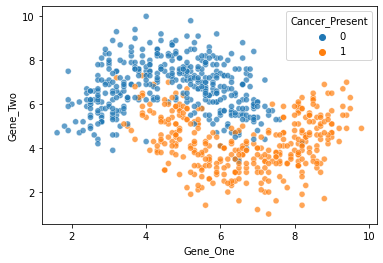

In [19]:
sns.scatterplot(x='Gene_One',y='Gene_Two',hue='Cancer_Present',
                data=full_test,alpha=0.7)

## Model Evaluation

In [20]:
y_pred = knn_model.predict(scaled_X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
accuracy_score(y_test,y_pred)

0.8986666666666666

In [23]:
confusion_matrix(y_test,y_pred)

array([[366,  35],
       [ 41, 308]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       401
           1       0.90      0.88      0.89       349

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



## Choosing K Value
1. Elbow method
2. CrossValidation

### 1. Elbow Method for K Value

In [25]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

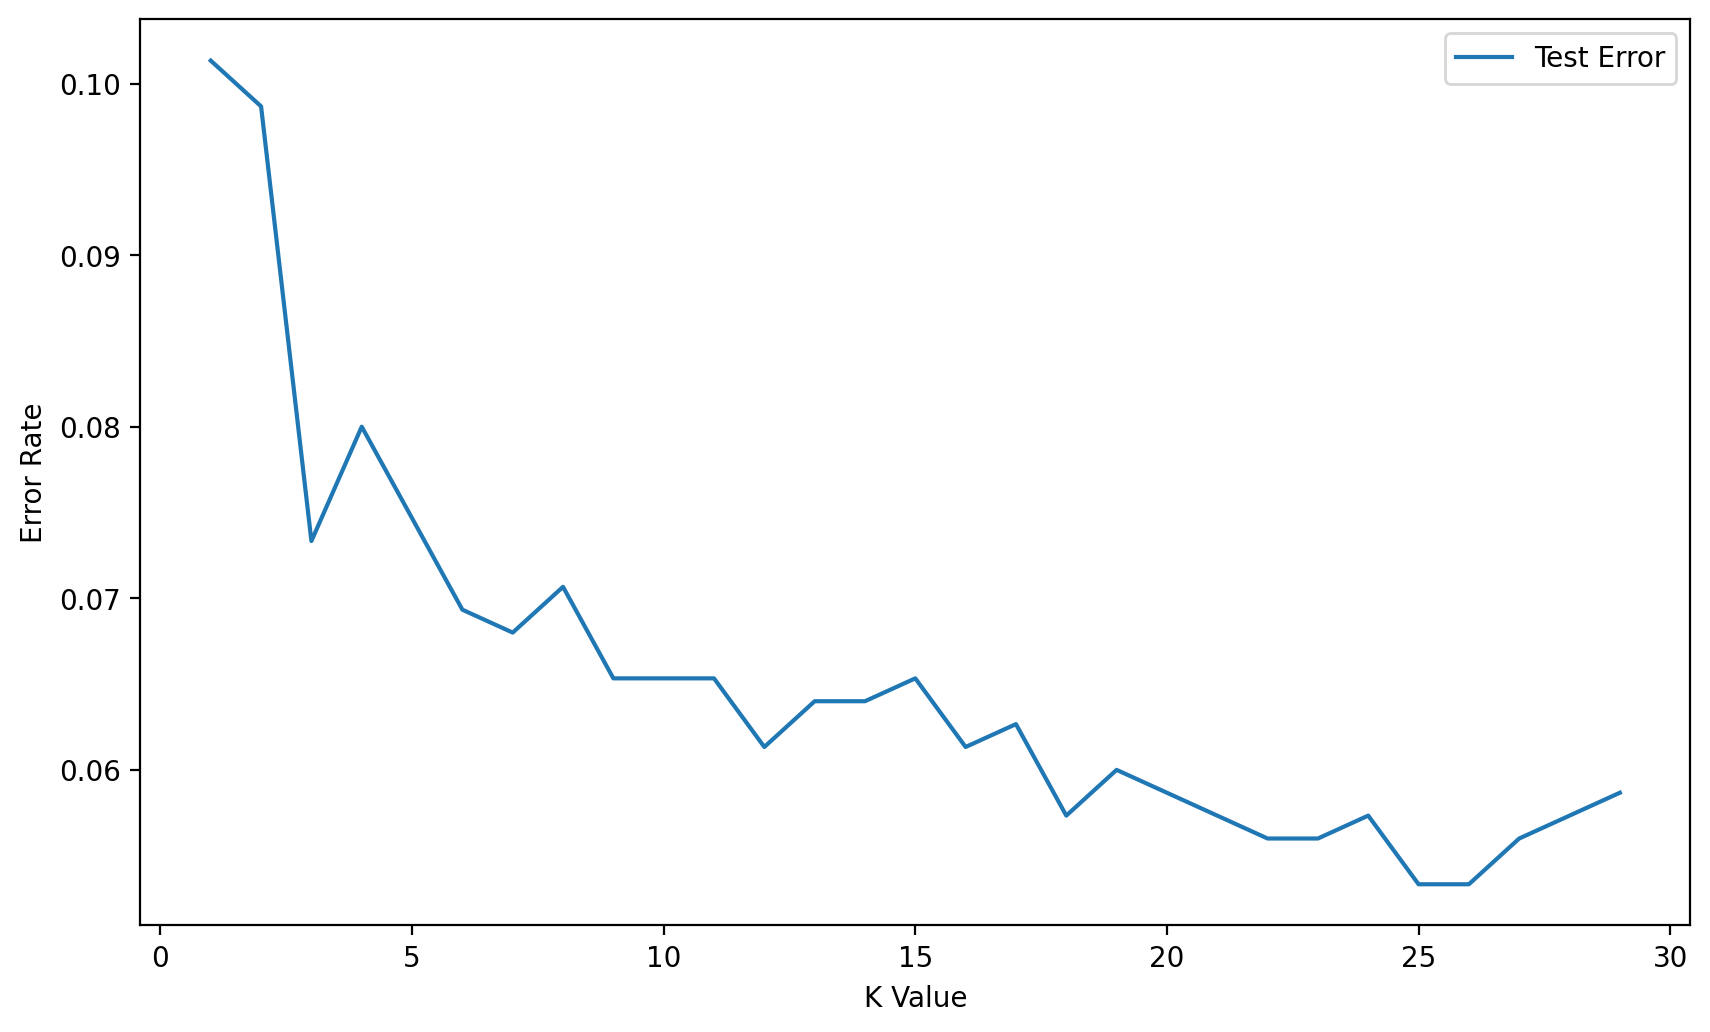

In [26]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### 2. Cross Validation Grid Search for K Value

#### Creating a Pipeline to find K value

**Using pipeline object for":**

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?*

*Yes!*


What happens can be discribed as follows:

* Step 1: Splitting te data into TRAINING data and TEST data according to the cv parameter specified in the GridSearchCV.
* Step 2: Fitting the scaler on the TRAINING data
* Step 3: Transforming the scaler on TRAINING data
* Step 4: Training the models using the transformed TRAINING data
* Step 5: Transforming the scaler on the TEST data
* Step 6: Predicting the trained models using the transformed TEST data

In [27]:
scaler = StandardScaler()

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
operations = [('scaler',scaler),('knn',knn)]

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline(operations)

In [33]:
from sklearn.model_selection import GridSearchCV

*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name


* knn_model + __ + n_neighbors
* knn_model__n_neighbors

*https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline*

In [34]:
k_values = list(range(1,30))

In [35]:
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [36]:
param_grid = {'knn__n_neighbors': k_values}
param_grid

{'knn__n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29]}

In [37]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [38]:
full_cv_classifier.fit(scaled_X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [39]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

**How many total runs did we do?**

In [41]:
len(k_values)

29

In [42]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90222222, 0.90488889, 0.92044444, 0.91911111, 0.92888889,
       0.92444444, 0.92577778, 0.92622222, 0.92622222, 0.92444444,
       0.92755556, 0.92666667, 0.92888889, 0.92977778, 0.92844444,
       0.92888889, 0.92755556, 0.92977778, 0.92755556, 0.928     ,
       0.92755556, 0.92755556, 0.92622222, 0.928     , 0.92711111,
       0.92933333, 0.92755556, 0.92844444, 0.92711111])

In [43]:
len(full_cv_classifier.cv_results_['mean_test_score'])

29

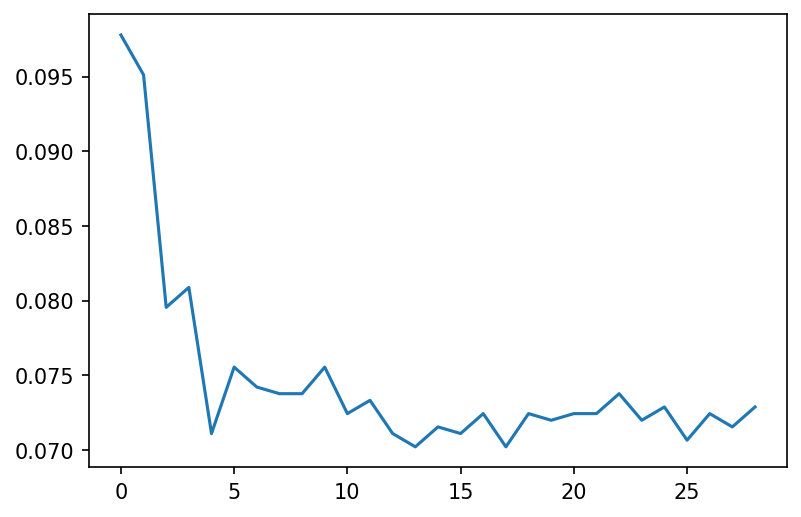

In [44]:
plt.figure(dpi= 150)
plt.plot(range(len(full_cv_classifier.cv_results_['mean_test_score'])),
         1 - full_cv_classifier.cv_results_['mean_test_score'])

## Final Model

In [45]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler',scaler),('knn14',knn14)]

In [46]:
pipe = Pipeline(operations)

In [47]:
pipe.fit(scaled_X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [48]:
pipe_pred = pipe.predict(scaled_X_test)

In [49]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       401
           1       0.95      0.91      0.93       349

    accuracy                           0.94       750
   macro avg       0.94      0.93      0.94       750
weighted avg       0.94      0.94      0.94       750



In [50]:
single_sample = X_test.iloc[40]

In [51]:
single_sample

Gene_One    3.8
Gene_Two    6.3
Name: 194, dtype: float64

In [52]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0], dtype=int64)

In [53]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.64285714, 0.35714286]])